DATASET:

Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.

COLUMNS:

Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

Price: Target variable stores information of the ticket price.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

Reading the datasets

In [2]:
busi = pd.read_csv('business.csv')

In [3]:
eco = pd.read_csv('economy.csv')

EXPLORATORY DATA ANALYSIS

In [4]:
busi.shape

(93487, 11)

In [5]:
eco.shape

(206774, 11)

In [6]:
busi.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'price'],
      dtype='object')

In [7]:
eco.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'price'],
      dtype='object')

In [8]:
data = pd.merge(busi, eco, how='outer')
data.shape

(300261, 11)

In [9]:
data.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [10]:
data.tail()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
300256,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697"
300257,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709"
300258,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"
300259,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"
300260,31-03-2022,Vistara,UK,824,20:30,Chennai,24h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"8,640"


In [11]:
data.nunique()

date             49
airline           8
ch_code           8
num_code       1255
dep_time        251
from              6
time_taken      483
stop             40
arr_time        266
to                6
price         12165
dtype: int64

In [12]:
data.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

In [13]:
data['date'] = pd.to_datetime(data['date'])

In [14]:
# convert dep_time to datetime format
data['dep_time'] = pd.to_datetime(data['dep_time'], format='%H:%M')

# format dep_time to include seconds
data['dep_time'] = data['dep_time'].dt.strftime('%H:%M:%S')

In [15]:
# Convert the dep_time to datetime format
data['dep_time'] = pd.to_datetime(data['dep_time'])

# Extract the hour and minute
data['dep_hr'] = data['dep_time'].dt.hour
data['dep_min'] = data['dep_time'].dt.minute

print(data[['dep_time', 'dep_hr', 'dep_min']])

                  dep_time  dep_hr  dep_min
0      2023-04-15 18:00:00      18        0
1      2023-04-15 19:00:00      19        0
2      2023-04-15 20:00:00      20        0
3      2023-04-15 21:25:00      21       25
4      2023-04-15 17:15:00      17       15
...                    ...     ...      ...
300256 2023-04-15 07:05:00       7        5
300257 2023-04-15 07:05:00       7        5
300258 2023-04-15 12:30:00      12       30
300259 2023-04-15 09:45:00       9       45
300260 2023-04-15 20:30:00      20       30

[300261 rows x 3 columns]


In [16]:
# convert arr_time to datetime format
data['arr_time'] = pd.to_datetime(data['arr_time'], format='%H:%M')

# format arr_time to include seconds
data['arr_time'] = data['arr_time'].dt.strftime('%H:%M:%S')

In [17]:
# Convert the arrival time to datetime format
data['arr_time'] = pd.to_datetime(data['arr_time'])

# Extract the hour and minute
data['arr_hr'] = data['arr_time'].dt.hour
data['arr_min'] = data['arr_time'].dt.minute

print(data[['arr_time', 'arr_hr', 'arr_min']])

                  arr_time  arr_hr  arr_min
0      2023-04-15 20:00:00      20        0
1      2023-04-15 21:15:00      21       15
2      2023-04-15 20:45:00      20       45
3      2023-04-15 23:55:00      23       55
4      2023-04-15 23:55:00      23       55
...                    ...     ...      ...
300256 2023-04-15 20:55:00      20       55
300257 2023-04-15 20:55:00      20       55
300258 2023-04-15 09:05:00       9        5
300259 2023-04-15 09:05:00       9        5
300260 2023-04-15 20:55:00      20       55

[300261 rows x 3 columns]


In [18]:
data['price'] = data['price'].str.replace(',', '')

# convert the price column to a float data type
data['price'] = data['price'].astype('float64')

In [19]:
data.dtypes

date          datetime64[ns]
airline               object
ch_code               object
num_code               int64
dep_time      datetime64[ns]
from                  object
time_taken            object
stop                  object
arr_time      datetime64[ns]
to                    object
price                float64
dep_hr                 int64
dep_min                int64
arr_hr                 int64
arr_min                int64
dtype: object

In [20]:
data.describe()

,num_code,price,dep_hr,dep_min,arr_hr,arr_min
count,300261.000000,300261.000000,300261.000000,300261.000000,300261.000000,300261.000000
mean,1417.771709,20883.717666,12.983531,27.020309,15.238935,29.485448
std,1974.514439,22695.911266,5.363186,17.761449,6.050231,18.562370
min,101.000000,1105.000000,0.000000,0.000000,0.000000,0.000000
25%,637.000000,4783.000000,8.000000,10.000000,10.000000,15.000000
50%,818.000000,7425.000000,12.000000,30.000000,17.000000,30.000000
75%,927.000000,42521.000000,18.000000,45.000000,20.000000,45.000000
max,9991.000000,123071.000000,23.000000,55.000000,23.000000,59.000000


DATA VISUALIZATION

In [21]:
data['airline'].value_counts() 

Vistara      127859
Air India     80894
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: airline, dtype: int64

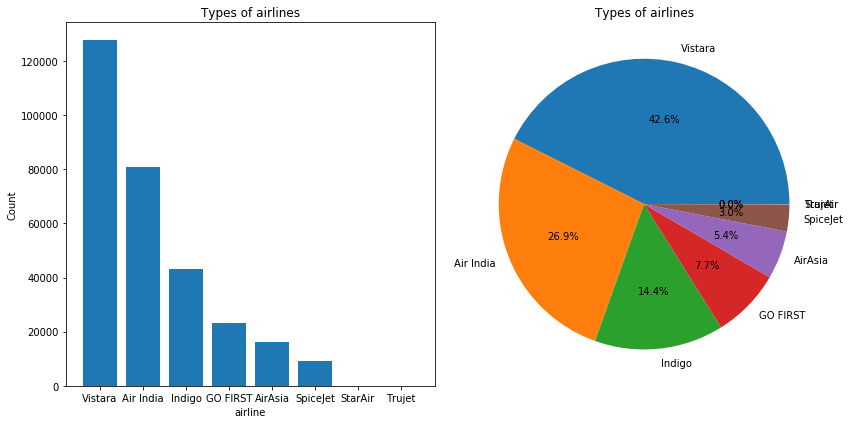

In [22]:
# Counting the frequency of each value in the "airline" attribute
value_counts = data['airline'].value_counts()

# Creating subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Bar plot
ax1.bar(value_counts.index, value_counts.values)
ax1.set_title("Types of airlines")
ax1.set_xlabel("airline")
ax1.set_ylabel("Count")

# Pie chart
ax2.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
ax2.set_title("Types of airlines")

plt.tight_layout()
plt.show()


In [23]:
data['ch_code'].value_counts()

UK    127859
AI     80894
6E     43120
G8     23177
I5     16098
SG      9011
S5        61
2T        41
Name: ch_code, dtype: int64

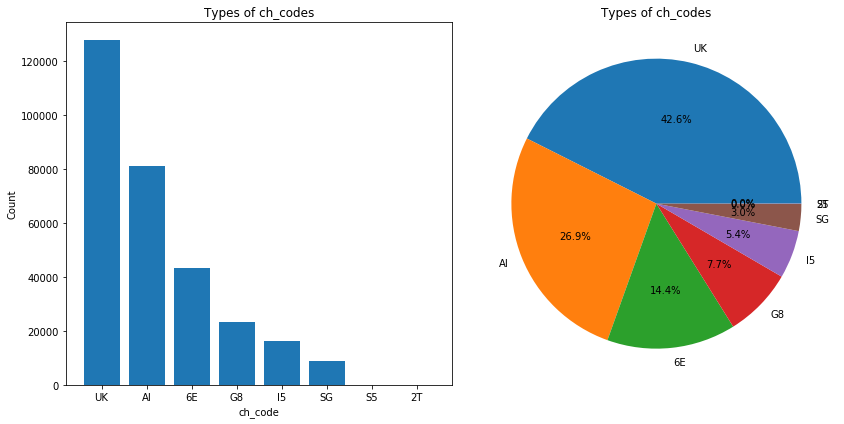

In [24]:
# Counting the frequency of each value in the "ch_code" attribute
value_counts = data['ch_code'].value_counts()

# Creating subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Bar plot
ax1.bar(value_counts.index, value_counts.values)
ax1.set_title("Types of ch_codes")
ax1.set_xlabel("ch_code")
ax1.set_ylabel("Count")

# Pie chart
ax2.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
ax2.set_title("Types of ch_codes")

plt.tight_layout()
plt.show()


In [25]:
data['from'].value_counts()

Delhi        61345
Mumbai       60903
Bangalore    52106
Kolkata      46347
Hyderabad    40860
Chennai      38700
Name: from, dtype: int64

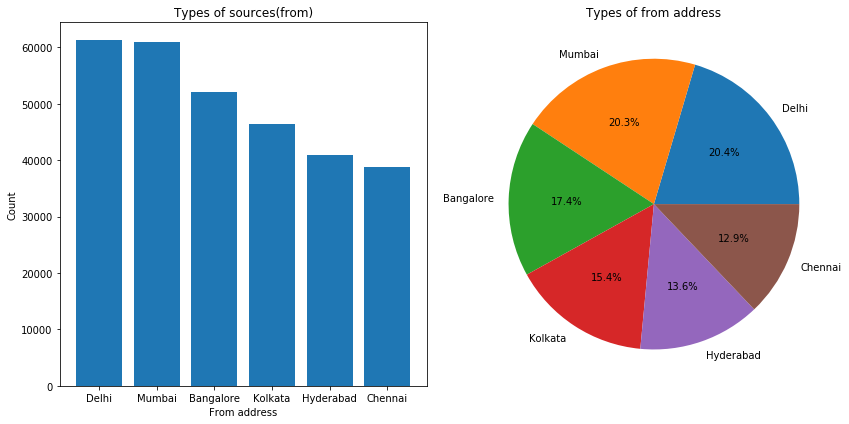

In [26]:
# Counting the frequency of each value in the "from" attribute
value_counts = data['from'].value_counts()

# Creating subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Bar plot
ax1.bar(value_counts.index, value_counts.values)
ax1.set_title("Types of sources(from)")
ax1.set_xlabel("From address")
ax1.set_ylabel("Count")

# Pie chart
ax2.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
ax2.set_title("Types of from address")

plt.tight_layout()
plt.show()


In [27]:
data['to'].value_counts()

Mumbai       59109
Delhi        57361
Bangalore    51112
Kolkata      49535
Hyderabad    42776
Chennai      40368
Name: to, dtype: int64

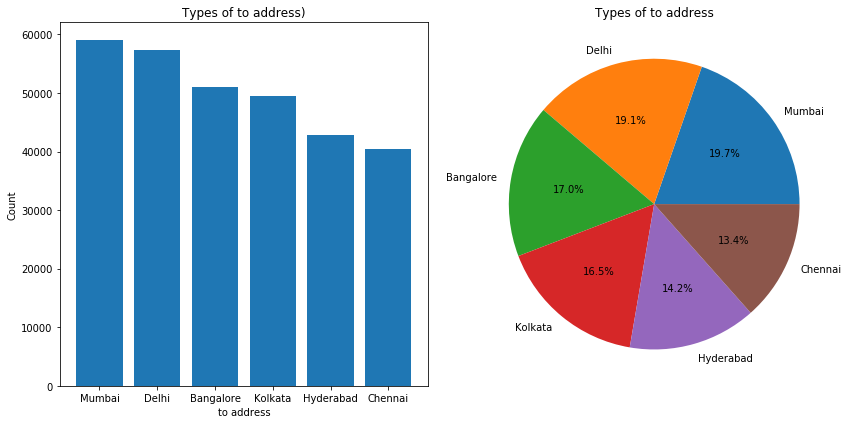

In [28]:
# Counting the frequency of each value in the "to" attribute
value_counts = data['to'].value_counts()

# Creating subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Bar plot
ax1.bar(value_counts.index, value_counts.values)
ax1.set_title("Types of to address)")
ax1.set_xlabel("to address")
ax1.set_ylabel("Count")

# Pie chart
ax2.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
ax2.set_title("Types of to address")

plt.tight_layout()
plt.show()


Plotting Boxplot to observe outliers

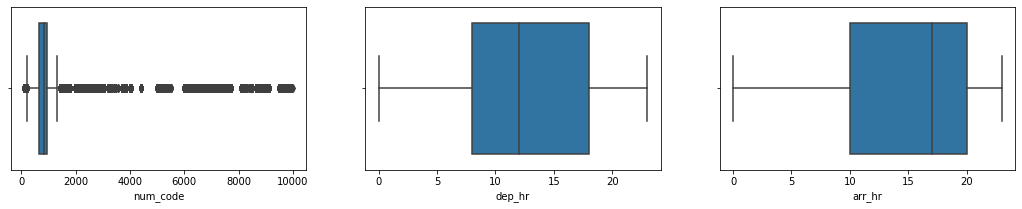

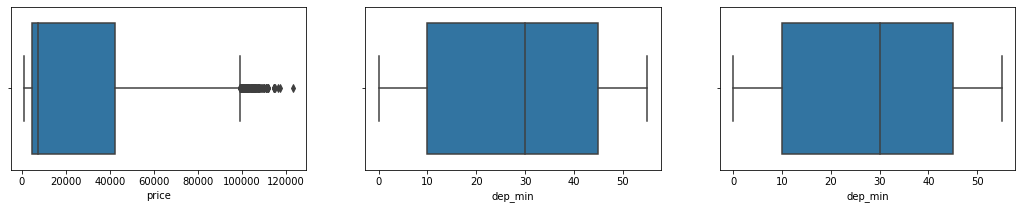

In [29]:
plt.figure(figsize = (18,3))
plt.subplot(1,3,1)
sns.boxplot(data['num_code'])
plt.subplot(1,3,2)
sns.boxplot(data['dep_hr'])
plt.subplot(1,3,3)
sns.boxplot(data['arr_hr'])
plt.show()
plt.figure(figsize = (18,3))
plt.subplot(1,3,1)
sns.boxplot(data['price'])
plt.subplot(1,3,2)
sns.boxplot(data['dep_min'])
plt.subplot(1,3,3)
sns.boxplot(data['dep_min'])
plt.show()

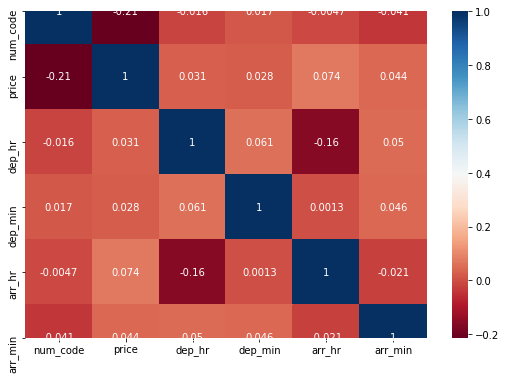

In [30]:
#correlation matrix
plt.figure(figsize=(9,6))
sns.heatmap(data.corr(),annot=True, cmap="RdBu")
plt.show() #'RdBu' says take red to blue and having white in the middle , Red is negatively correlated and Blue is positively correlated

In [31]:
num = data._get_numeric_data()
num.head()

,num_code,price,dep_hr,dep_min,arr_hr,arr_min
0,868,25612.0,18,0,20,0
1,624,25612.0,19,0,21,15
2,531,42220.0,20,0,20,45
3,839,44450.0,21,25,23,55
4,544,46690.0,17,15,23,55


In [32]:
num.isnull().sum()

num_code    0
price       0
dep_hr      0
dep_min     0
arr_hr      0
arr_min     0
dtype: int64

In [33]:
num = (num - num.min()) / (num.max() - num.min())
num

,num_code,price,dep_hr,dep_min,arr_hr,arr_min
0,0.077553,0.200933,0.782609,0.000000,0.869565,0.000000
1,0.052882,0.200933,0.826087,0.000000,0.913043,0.254237
2,0.043478,0.337102,0.869565,0.000000,0.869565,0.762712
3,0.074621,0.355386,0.913043,0.454545,1.000000,0.932203
4,0.044793,0.373752,0.739130,0.272727,1.000000,0.932203
...,...,...,...,...,...,...
300256,0.073913,0.054048,0.304348,0.090909,0.869565,0.932203
300257,0.073913,0.054146,0.304348,0.090909,0.869565,0.932203
300258,0.073306,0.061780,0.521739,0.545455,0.391304,0.084746
300259,0.072902,0.061780,0.391304,0.818182,0.391304,0.084746


In [34]:
cat=data.drop(num,axis=1)
cat=cat.astype('category')
cat.head() # Taking categorical columns

,date,airline,ch_code,dep_time,from,time_taken,stop,arr_time,to
0,2022-11-02,Air India,AI,2023-04-15 18:00:00,Delhi,02h 00m,non-stop,2023-04-15 20:00:00,Mumbai
1,2022-11-02,Air India,AI,2023-04-15 19:00:00,Delhi,02h 15m,non-stop,2023-04-15 21:15:00,Mumbai
2,2022-11-02,Air India,AI,2023-04-15 20:00:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,2023-04-15 20:45:00,Mumbai
3,2022-11-02,Air India,AI,2023-04-15 21:25:00,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,2023-04-15 23:55:00,Mumbai
4,2022-11-02,Air India,AI,2023-04-15 17:15:00,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,2023-04-15 23:55:00,Mumbai


In [35]:
cat['airline'].value_counts()

Vistara      127859
Air India     80894
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: airline, dtype: int64

In [36]:
cat['ch_code'].value_counts()

UK    127859
AI     80894
6E     43120
G8     23177
I5     16098
SG      9011
S5        61
2T        41
Name: ch_code, dtype: int64

In [37]:
cat['from'].value_counts()

Delhi        61345
Mumbai       60903
Bangalore    52106
Kolkata      46347
Hyderabad    40860
Chennai      38700
Name: from, dtype: int64

In [38]:
cat['to'].value_counts()

Mumbai       59109
Delhi        57361
Bangalore    51112
Kolkata      49535
Hyderabad    42776
Chennai      40368
Name: to, dtype: int64

In [39]:
cat['stop'].value_counts()

1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t                      243603
non-stop                                                                         36044
2+-stop                                                                          13288
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t                 1839
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t                 1398
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t                674
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t               381
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t                  354
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t                  321
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t          301
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia KLH\n\t\t\t\t\t\t\t\t\t\t\t\t                  284
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JGB\n\t

In [40]:
data_cat=cat[['airline','ch_code','from','to']]

In [41]:
data_cat.head()

,airline,ch_code,from,to
0,Air India,AI,Delhi,Mumbai
1,Air India,AI,Delhi,Mumbai
2,Air India,AI,Delhi,Mumbai
3,Air India,AI,Delhi,Mumbai
4,Air India,AI,Delhi,Mumbai


In [42]:
data_cat_gd = pd.get_dummies(data_cat)

In [43]:
data_cat_gd.head()

,airline_Air India,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,ch_code_2T,ch_code_6E,...,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [44]:
final_df = pd.merge(num, data_cat_gd, how='outer', left_index=True, right_index=True)

In [45]:
final_df.head()

,num_code,price,dep_hr,dep_min,arr_hr,arr_min,airline_Air India,airline_AirAsia,airline_GO FIRST,airline_Indigo,...,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,0.077553,0.200933,0.782609,0.000000,0.869565,0.000000,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0.052882,0.200933,0.826087,0.000000,0.913043,0.254237,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0.043478,0.337102,0.869565,0.000000,0.869565,0.762712,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.074621,0.355386,0.913043,0.454545,1.000000,0.932203,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0.044793,0.373752,0.739130,0.272727,1.000000,0.932203,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [46]:
final_df.isnull().sum().sum()

0

TRAIN & TEST SPLIT

In [47]:
X = final_df.drop("price", axis=1)
y = final_df["price"]

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RANDOM FOREST REGRESSOR

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42,max_depth=10)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [51]:
y_pred = rf.predict(X_train)

In [52]:
y_pred

array([0.01529821, 0.04852515, 0.2537051 , ..., 0.03236011, 0.12496711,
       0.03077044])

In [53]:
rf.fit(X_test, y_test)

RandomForestRegressor(max_depth=10, random_state=42)

In [54]:
y_preds =rf.predict(X_test)

In [55]:
mae = mean_absolute_error(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.12089655409770894
Mean Squared Error: 0.02336616887047131
Root Mean Squared Error: 0.15285996490406278
R-squared: 0.3235960256262317


In [56]:
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.12211497348314197
Mean Squared Error: 0.023755577723142657
Root Mean Squared Error: 0.15412844553534774
R-squared: 0.3143672119834582


GRID SEARCH CV 

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

In [58]:
# Define the parameters for tuning
params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [59]:
# Define the scoring metric
scoring = make_scorer(mean_squared_error, greater_is_better=False)

# Perform grid search
grid_search = GridSearchCV(rf, params, scoring=scoring, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=10, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [60]:
# Print the best parameters and the corresponding mean squared error
print('Best Parameters:', grid_search.best_params_)
print('Best MSE:', -grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Best MSE: 0.022848767034842808


In [61]:
y_trpred_gs = grid_search.predict(X_train)

In [62]:
mae = mean_absolute_error(y_train, y_trpred_gs)
mse = mean_squared_error(y_train, y_trpred_gs)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_trpred_gs)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.11495423952909978
Mean Squared Error: 0.021911876362246573
Root Mean Squared Error: 0.14802660694026115
R-squared: 0.36758006662641596


In [63]:
# Fit the grid search to the data
grid_search.fit(X_test, y_test)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=10, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [64]:
y_tspred_gs = grid_search.predict(X_test)

In [65]:
mae = mean_absolute_error(y_test, y_tspred_gs)
mse = mean_squared_error(y_test, y_tspred_gs)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_tspred_gs)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.11205401310133888
Mean Squared Error: 0.021095123414532867
Root Mean Squared Error: 0.1452416035939182
R-squared: 0.3893382609449848


DECISION TREE REGRESSOR

In [66]:
from sklearn.tree import DecisionTreeRegressor

# create an instance of DecisionTreeRegressor
dtc = DecisionTreeRegressor(random_state=42, max_depth = 10)

In [67]:
# fit the model on training data
dtc.fit(X_train, y_train)

# predict on test data
y_tr_dtc = dtc.predict(X_train)

In [68]:
y_tr_dtc

array([0.01670687, 0.04819868, 0.26457938, ..., 0.03146921, 0.09497932,
       0.03162357])

In [69]:
mae = mean_absolute_error(y_train, y_tr_dtc)
mse = mean_squared_error(y_train, y_tr_dtc)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_tr_dtc)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.1225054208346339
Mean Squared Error: 0.024112928195555366
Root Mean Squared Error: 0.15528338029407837
R-squared: 0.30405337312191516


In [70]:
# fit the model on training data
dtc.fit(X_test, y_test)

# predict on test data
y_ts_dtc = dtc.predict(X_test)

In [71]:
y_ts_dtc

array([0.01675238, 0.1817489 , 0.1485913 , ..., 0.19019805, 0.04840443,
       0.26215493])

In [72]:
mae = mean_absolute_error(y_test, y_ts_dtc)
mse = mean_squared_error(y_test, y_ts_dtc)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_ts_dtc)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.1212493235823779
Mean Squared Error: 0.023956222086383285
Root Mean Squared Error: 0.1547779767485778
R-squared: 0.30651516215445984


k-NN REGRESSOR

In [73]:
# K-Nearest Neighbor Regressor
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [74]:
trainpreds_knn=knn.predict(X_train)

In [75]:
trainpreds_knn

array([0.01509027, 0.05514242, 0.21097273, ..., 0.06696333, 0.03547095,
       0.02171917])

In [76]:
knn.fit(X_test,y_test)

KNeighborsRegressor(n_neighbors=4)

In [77]:
testpred_knn=knn.predict(X_test)

In [78]:
mae = mean_absolute_error(y_test, testpred_knn)
mse = mean_squared_error(y_test, testpred_knn)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, testpred_knn)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.10886490148505186
Mean Squared Error: 0.024516013537677704
Root Mean Squared Error: 0.1565759034388041
R-squared: 0.29031031639754545


In [79]:
mae = mean_absolute_error(y_train, trainpreds_knn)
mse = mean_squared_error(y_train, trainpreds_knn)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, trainpreds_knn)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.11408700510394228
Mean Squared Error: 0.026731784274733918
Root Mean Squared Error: 0.16349857575750903
R-squared: 0.22846802571813407
